## Email +TECA

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib
import matplotlib.pyplot as plt


import scipy.stats as stats
import matplotlib.mlab as mlab
import math

%matplotlib inline
plt.style.use('ggplot')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints size
print("Current size:", fig_size)

# Set figure width
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


Current size: [6.0, 4.0]


In [2]:
df = pd.read_csv("ReportDettagliato_notebook.csv",
                 sep=",")

# Panoramica del report per i valori di ogni colonna

**I valori delle colonne che riportano le percentuali sono trasformati in decimali**

**0.401552 =  40,1552 %**

**0.006100 = 0,6 %**

- mean = media aritmetica
- std = deciazione standard dalla media
- min = valore minimo
- 25%, 50%, 75% = quartili
- max = valore massimo

In [3]:
df.describe()

,Totale aperture,% Lettori unici su lettori totali,% OR nel gruppo,Totale cliccatori,% Cliccatori gruppo su cliccatori totali,% Cliccatori su appartenenti al gruppo
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,3692.314286,0.089422,0.401552,79.045238,0.003670,0.012656
std,7112.093393,0.178895,0.319617,148.845935,0.006916,0.017323
min,1.000000,0.000000,0.007900,0.000000,0.000000,0.000000
25%,357.750000,0.010100,0.288075,11.000000,0.000500,0.006100
50%,1238.500000,0.033400,0.326100,32.000000,0.001500,0.007700
75%,3436.750000,0.091525,0.410650,75.250000,0.003500,0.012025
max,38650.000000,0.989600,3.764700,844.000000,0.039200,0.181800


# Totale delle aperture dell'email = 1550772
### il numero è una astrazione statistica, in quanto un destinatario può appartenere a più gruppi creati con MailUp. La somma totale di ciascun gruppo può essere superiore al numero totale di letture e clic.

In [4]:
print("Totale aperture = ", df['Totale aperture'].sum(axis=0))

Totale aperture =  1550772.0


# Le 5 liste di destinatari che hanno i valori massimi di apertura dell'email

In [5]:
totale_aperture = df.sort_values(['Totale aperture'], ascending=False)
totale_aperture.head()

,Nome,Totale aperture,% Lettori unici su lettori totali,% OR nel gruppo,Totale cliccatori,% Cliccatori gruppo su cliccatori totali,% Cliccatori su appartenenti al gruppo
151,csbno_11_04_2016_tutti_csbno,38650.0,0.9896,0.3619,844.0,0.0392,0.0909
117,csbno_01_02_2016_tutti,36925.0,0.9417,0.3349,798.0,0.0371,0.0532
131,csbno_02_12_2015_tutti,35418.0,0.8994,0.3287,760.0,0.0353,0.0375
184,csbno_21_10_2015_tutti,33622.0,0.8490,0.3311,717.0,0.0333,0.0227
212,Csbno_tutti_21_04_2016,33353.0,0.8683,0.3290,642.0,0.0298,0.0051


# Le 5 liste di destinatari che hanno i valori minimi di apertura dell'email

In [6]:
totale_aperture.tail()

,Nome,Totale aperture,% Lettori unici su lettori totali,% OR nel gruppo,Totale cliccatori,% Cliccatori gruppo su cliccatori totali,% Cliccatori su appartenenti al gruppo
182,csbno_21_04_2016_migrazione_cafelib_aggiornamento,2.0,0.0,0.3333,1.0,0.0,0.0070
81,Conferenza_Stampa_Arese_9_maggio,1.0,0.0,0.0500,0.0,0.0,0.0086
266,mail con errore MBKS,1.0,0.0,0.0079,1.0,0.0,0.0083
169,csbno_16_05_2016_gallarate_cafelib_2,1.0,0.0,0.0385,0.0,0.0,0.0248
168,csbno_16_05_2016_gallarate_cafelib,1.0,0.0,0.0313,0.0,0.0,0.0062


# Nel grafico sottostante (boxplot) sono evidenziati per ogni colonnna i valori più frequenti vicino alla media (rettangolo con bordo rosso). 

Le crocette nere (+) sono i valori "estremi" (outliers) che rappresentano generalmente eccezioni quantitative (o, in questo caso, liste di destinatari della newsletter già fortemente fidelizzate)

### Il Totale delle aperture e il Totale dei cliccatori sono due variabili covarianti e fortemente correlate (come si vede nel grafico scatter più in basso "Covarianza tra Totale delle aperture dell'email con il Totale dei cliccatori").

#### Questa analisi è importante per capire come agire in seguito su quelle liste che non hanno dimostrato una risposta forte all'email

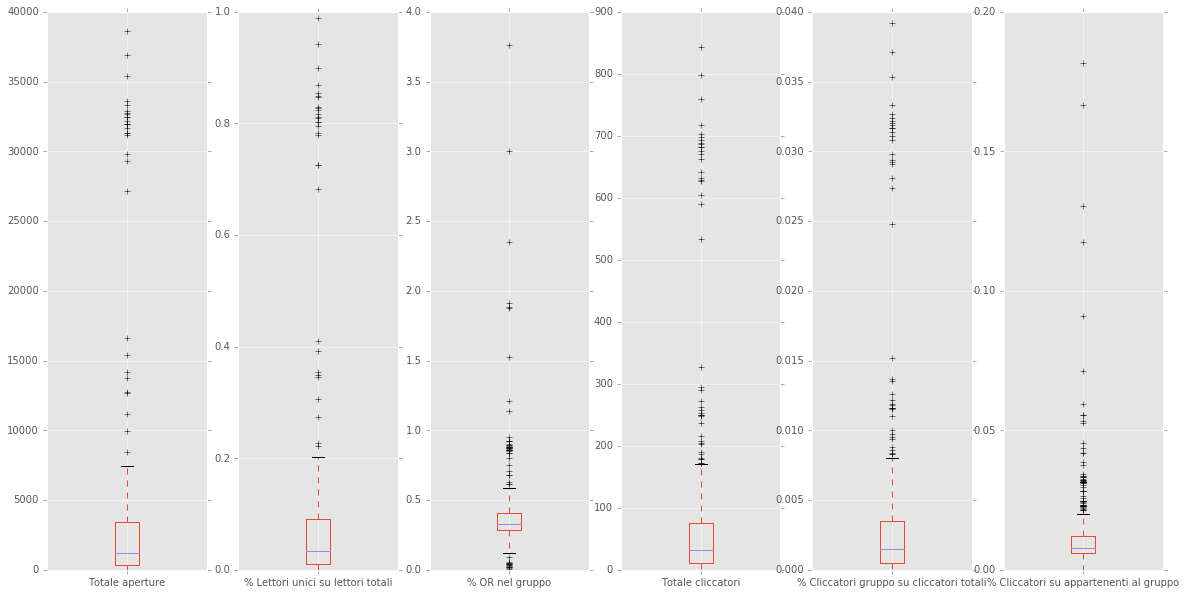

In [7]:
boxplots = df[df.columns[:]].plot(subplots=True, kind='box', figsize=(20,10))


# Coefficienti di correlazione tra i valori delle colonne.

- -1 = correlazione negativa (inversa), cioè al variare di un valore corrisponde una variazione inversa dell'altro

- 1 = correlazione perfetta (all'aumentare di un valore corrisponde l'aumento dell'altro, come nel caso Totale aperture - Totale cliccatori)

In [8]:
df.corr()

,Totale aperture,% Lettori unici su lettori totali,% OR nel gruppo,Totale cliccatori,% Cliccatori gruppo su cliccatori totali,% Cliccatori su appartenenti al gruppo
Totale aperture,1.000000,0.994160,-0.048287,0.981368,0.981382,0.181778
% Lettori unici su lettori totali,0.994160,1.000000,-0.060675,0.987479,0.987468,0.194465
% OR nel gruppo,-0.048287,-0.060675,1.000000,-0.014891,-0.014835,0.205818
Totale cliccatori,0.981368,0.987479,-0.014891,1.000000,0.999993,0.226749
% Cliccatori gruppo su cliccatori totali,0.981382,0.987468,-0.014835,0.999993,1.000000,0.226490
% Cliccatori su appartenenti al gruppo,0.181778,0.194465,0.205818,0.226749,0.226490,1.000000


# La "distribuzione normale" dei dati non è possibile (la curva gaussiana non è allineata al centro). 

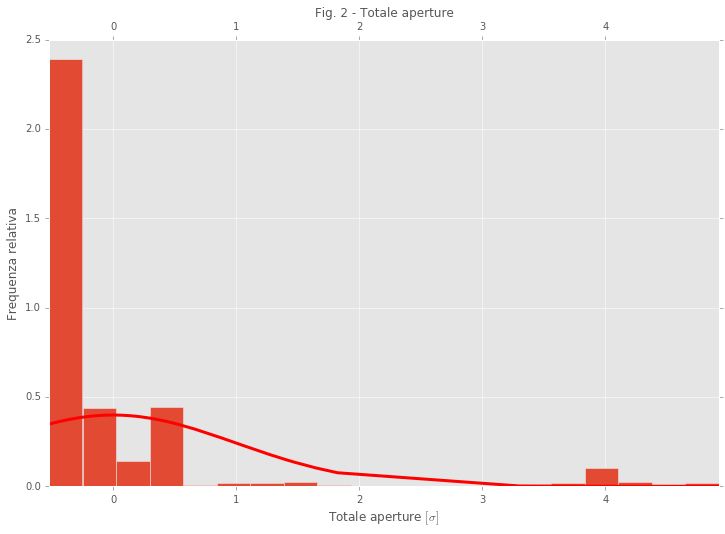

In [9]:
h = sorted(df['Totale aperture'])
hmean = np.mean(h)
hstd = np.std(h)
h_n = (h - hmean) / hstd
pdf = stats.norm.pdf( h_n )

# plot data
f,ax1 = plt.subplots()

ax1.hist( h_n, 20, normed=1 )
ax1.plot( h_n , pdf, lw=3, c='r')
ax1.set_xlim( [h_n.min(), h_n.max()] )
ax1.set_xlabel( r'Totale aperture $[\sigma]$' )
ax1.set_ylabel( r'Frequenza relativa')

ax2 = ax1.twiny()
ax2.grid( False )
ax2.set_xlim( ax1.get_xlim() )
ax2.set_ylim( ax1.get_ylim() )
ax2.set_xlabel( r'Fig. 2 - Totale aperture' )

ticklocs = ax2.xaxis.get_ticklocs()
ticklocs = [ round( t*hstd + hmean, 2) for t in ticklocs ]

In [10]:
df.columns

Index(['Nome', 'Totale aperture', '% Lettori unici su lettori totali',
       '% OR nel gruppo', 'Totale cliccatori',
       '% Cliccatori gruppo su cliccatori totali',
       '% Cliccatori su appartenenti al gruppo'],
      dtype='object')

# Covarianza tra Totale delle aperture dell'email con il Totale dei cliccatori

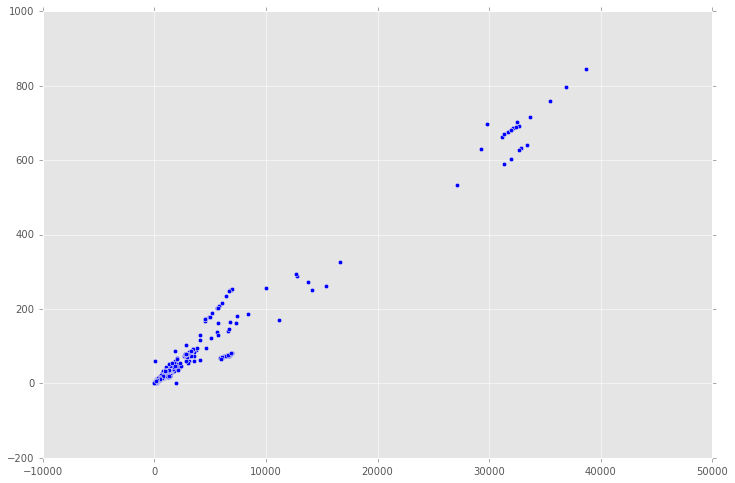

In [11]:
df_aperture = df['Totale aperture']
df_cliccatori = df['Totale cliccatori']
plt.scatter(df_aperture,df_cliccatori)

# Covarianza tra la percentuale di lettori unici dell'email con il Totale dei cliccatori

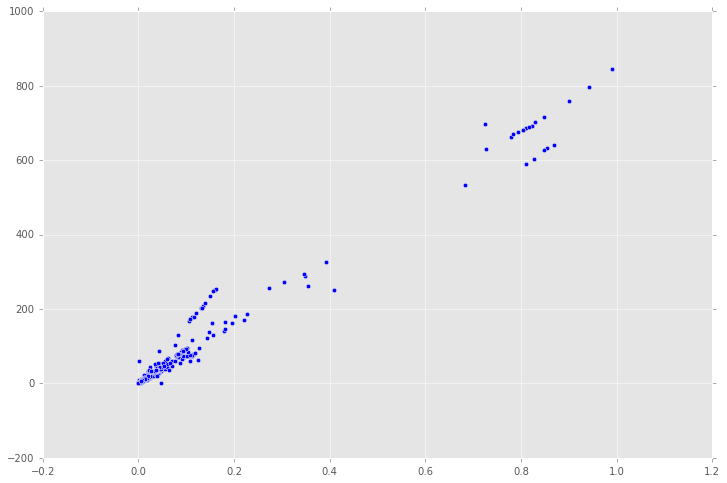

In [12]:
df_lettori_unici = df['% Lettori unici su lettori totali']
df_cliccatori_gruppo = df['Totale cliccatori']
plt.scatter(df_lettori_unici,df_cliccatori_gruppo)

# Quali liste meritano una seconda email?

In base al diagramma a scatola (boxplot) delle aperture della newsletter, alla frequenza relativa (Fig. 2) e tenuto conto della correlazione tra aperture e cliccatori, le liste di destinatari che hanno un punteggio di apertura della email uguale o inferiore a 7500.

Le altre liste sono con tutta probabilità già fidelizzate e si correrebbe il rischio di generare insistenza o spam.

### i quadrati blu nel diagramma sottostante sono appunto quei valori altissimi che ci permetteranno di escludere le liste che hanno un tasso di apertura e cliccatori ampiamente fuori dai valori medi e dal 3° quartile.

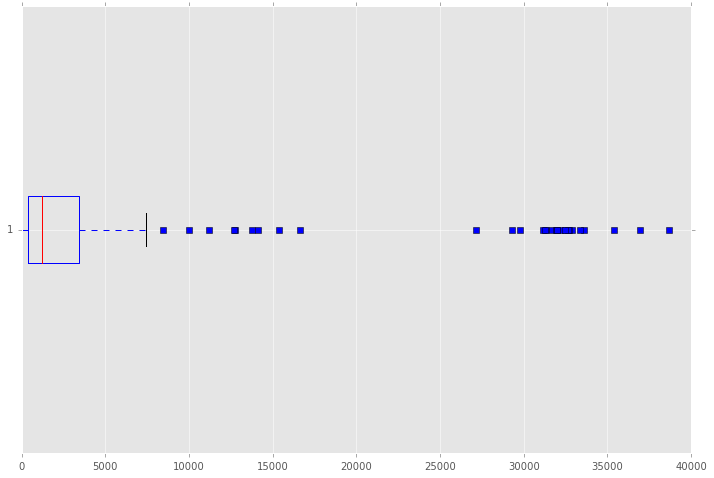

In [13]:
df_aperture_medie = df['Totale aperture']
secondo_invio = plt.boxplot(df_aperture_medie, 0, 'rs', 0)

# Ecco le liste:

In [14]:
liste_sec = df[df['Totale aperture'] <= 7000]
liste_secondo_invio = liste_sec[liste_sec['Totale cliccatori'] > 1]
liste_secondo_invio.describe()

,Totale aperture,% Lettori unici su lettori totali,% OR nel gruppo,Totale cliccatori,% Cliccatori gruppo su cliccatori totali,% Cliccatori su appartenenti al gruppo
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,1999.924119,0.045950,0.413834,44.222222,0.002054,0.011560
std,2096.956476,0.042257,0.331863,46.349094,0.002157,0.016071
min,2.000000,0.000100,0.021000,2.000000,0.000100,0.000000
25%,412.000000,0.011000,0.288900,12.000000,0.000600,0.006000
50%,1223.000000,0.033100,0.325600,32.000000,0.001500,0.007700
75%,2880.000000,0.082100,0.415900,71.000000,0.003300,0.010000
max,6971.000000,0.181600,3.764700,253.000000,0.011800,0.181800


# per un totale di 370 su 422 iniziali

In [15]:
liste_secondo_invio.to_csv('liste_secondo_invio.csv')

### Come si può vedere dall'allungamento dei rettangoli e dalla diminuzione delle crocette (outliers, valori estremi fuori range) nella colonna "Totale aperture" e "Totale cliccatori" (rispetto al primo grafico a inizio pagina), abbiamo un range di possibili destinatari verso i quali si può replicare il messaggio d'invito a sostenere il progetto +TECA

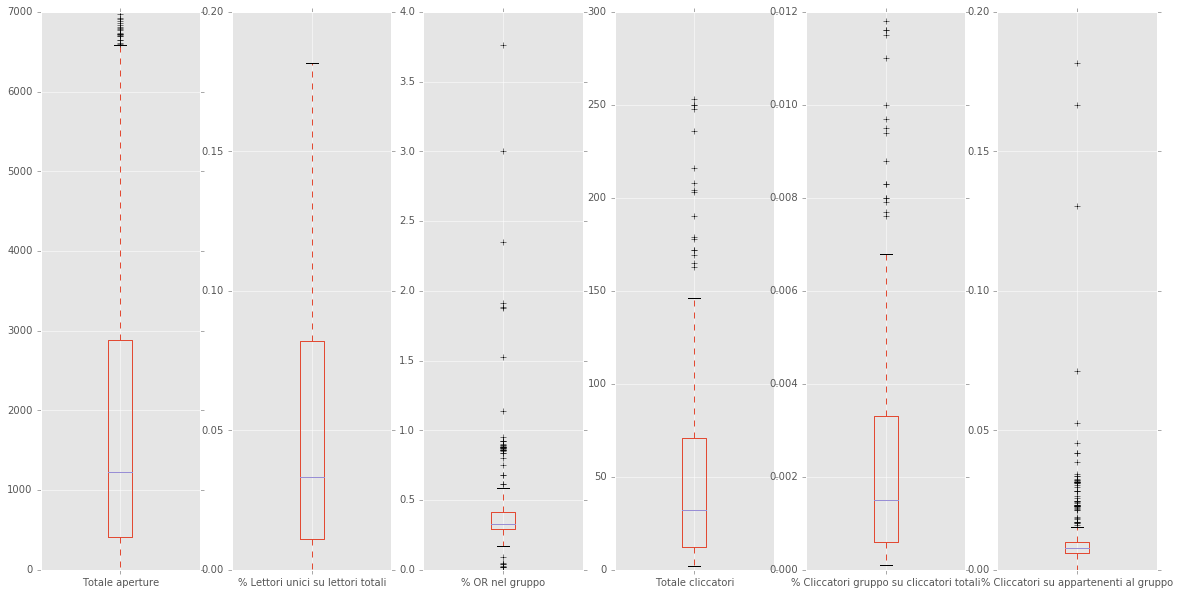

In [16]:
boxplots = liste_secondo_invio[liste_secondo_invio.columns[:]].plot(subplots=True, kind='box', figsize=(20,10))

### Volendo, conoscendo il numero esatto di destinatari unici di queste 370 liste, a questo punto si potrebbe calcolare la 

## probabilità condizionata 

## che si verifichi un clic e di conseguenza aumenti la probabilità stessa dell'invio della email a sostegno del progetto +TECA

### Senza quel dato è quasi impossibile purtroppo, al momento, trarre altre conclusioni dai dati esportati da MailUp, senza correre il rischio di sbagliare completamente la premessa del ragionamento.

### Di sicuro abbiamo estratto un gruppo di destinatari con una distribuzione media delle aperture della email (e di consegunza dei clic) più omogeneo rispetto alla Fig. 2 iniziale (vedi istogramma in alto)

(array([ 118.,  108.,   33.,   12.,   28.,    8.,    4.,    4.,   22.,   32.]),
 array([  2.00000000e+00,   6.98900000e+02,   1.39580000e+03,
          2.09270000e+03,   2.78960000e+03,   3.48650000e+03,
          4.18340000e+03,   4.88030000e+03,   5.57720000e+03,
          6.27410000e+03,   6.97100000e+03]),
 <a list of 10 Patch objects>)

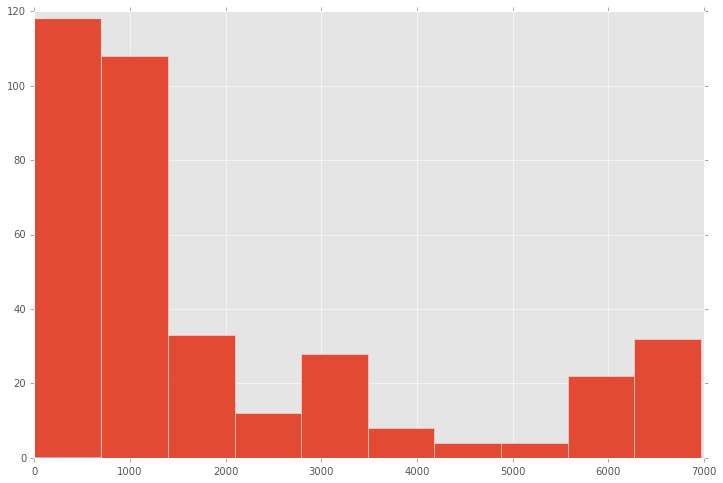

In [22]:
plt.hist(liste_secondo_invio['Totale aperture'])